In [1]:
import pandas as pd
def fetch_train(name):
    filename = "./../Dataset/" + name + ".csv"
    df = pd.read_csv(filename)
    return df
train_1 = fetch_train("train_1").fillna(0)
train_2 = fetch_train("train_2").fillna(0)
y = train_1.loc[1][1:]
ind = pd.to_datetime(y.index)
arr = []
for i in range(len(y)):
    arr.append(y[i])
arr = pd.DataFrame(arr)
arr.index = ind

In [2]:
len(arr)

550

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


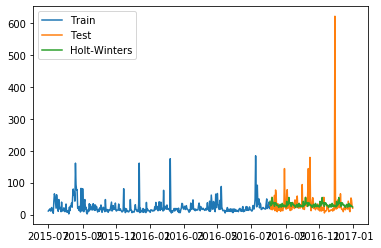

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train, test = arr[0:400],arr[400:]
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=30).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(arr[400:],pred))
print(rmse)

54.74230636282576
